<a href="https://colab.research.google.com/github/Armin-94/Code/blob/main/Titanic_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>1.Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# <b>2.Reading Data

In [ ]:
TrainDf=pd.read_csv('train.csv')
TestDf=pd.read_csv('test.csv')

In [ ]:
pd.DataFrame(TrainDf.isna().sum(), columns=['The Number of Missing Values'])

,The Number of Missing Values
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df=TrainDf[TrainDf['Embarked'].notna()].reset_index(drop=True).copy()

# <b>3.Data Cleaning

### 3.1.Calculating Missing Values for <b>Age</b> Data By Using <b>_Cosine Similarity_</b>


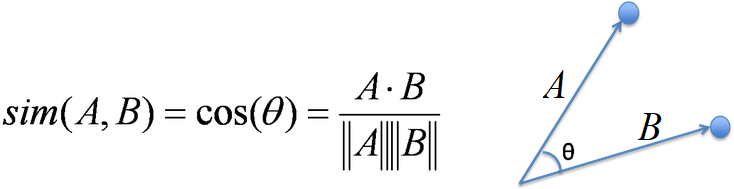
1. Choose appropriate features to calculate the cosine index

2. Split the samples with <b>Unknown Age</b>, and name it <b>Age_na_mtx</b> matrix

3. Name samples with known Age, <b>Age_mtx</b> matrix

4. Use below equation to calculate <b>The Cosine Index</b> between each samples of <b>Age_na_mtx</b> and <b>Age_mtx</b>, one by one to find the most similar samples

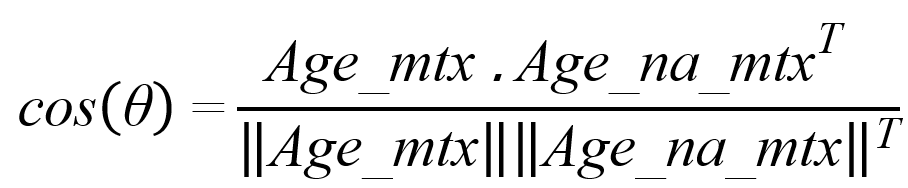

5. Finally, use the age of the most similar samples in <b>Age_mtx</b> for <b>Age_na_mtx</b> samples

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

df2=df[['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch','Survived']].copy()

CT=make_column_transformer(
    (OneHotEncoder(drop='first' ,categories=[['female', 'male'], ['S', 'C', 'Q']]), ['Sex', 'Embarked']),
    remainder='passthrough'
)

df2=pd.DataFrame(CT.fit_transform(df2), columns=['male', 'C', 'Q', 'Pclass', 'SibSp', 'Parch','Survived'])
df2

,male,C,Q,Pclass,SibSp,Parch,Survived
0,1.0,0.0,0.0,3.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0
2,0.0,0.0,0.0,3.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,1.0,0.0,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
884,1.0,0.0,0.0,2.0,0.0,0.0,0.0
885,0.0,0.0,0.0,1.0,0.0,0.0,1.0
886,0.0,0.0,0.0,3.0,1.0,2.0,0.0
887,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
from numpy.linalg import norm

#------------------------------------------------Extracting Data with Age Nan & Data With Numeric Age------------------------------------------------------------

Age_na_mtx=df2[df['Age'].isna()]
Age_mtx=df2[df['Age'].notna()]

#----------------------------------------------------Calculating Inner Product of Two A & B Matrix------------------------------------------------------------

a1=Age_mtx @ Age_na_mtx.T

#-------------------------------------------------Calculating The Product of The Norm of A & B Matrixs------------------------------------------------------------

a2=norm(Age_mtx, axis=1).reshape(-1, 1) * norm(Age_na_mtx, axis=1).reshape(1, -1)

#-------------------------------------------------------Calculating The Cosine Similarity Index------------------------------------------------------------

C1=a1/a2

#----------------------------------------------------------Finding The Most Similar argument----------------------------------------------------------------

pd.DataFrame(C1.idxmax(axis=0), columns=['The index of the most simmilar arguments']).T
SimDf=pd.DataFrame(C1.idxmax(axis=0), columns=['The Most Simmilar Indecies']).reset_index(drop=False)
SimDf['Age']=np.asanyarray(df.loc[SimDf.iloc[:, 1].values, 'Age'])

SimDf

,index,The Most Simmilar Indecies,Age
0,5,115,70.5
1,17,21,34.0
2,19,779,13.0
3,26,57,28.5
4,28,22,15.0
...,...,...,...
172,857,57,28.5
173,861,70,16.0
174,866,4,35.0
175,876,4,35.0


In [ ]:
df.loc[SimDf['index'], 'Age']=df.loc[SimDf['The Most Simmilar Indecies'], 'Age'].values

df.loc[SimDf['index']]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,70.5,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,34.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,13.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,28.5,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,15.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
857,860,0,3,"Razi, Mr. Raihed",male,28.5,0,0,2629,7.2292,NaN,C
861,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,16.0,8,2,CA. 2343,69.5500,NaN,S
866,869,0,3,"van Melkebeke, Mr. Philemon",male,35.0,0,0,345777,9.5000,NaN,S
876,879,0,3,"Laleff, Mr. Kristo",male,35.0,0,0,349217,7.8958,NaN,S


### 3.2.Comparing Data Distribution <b>Before</b> and <b>After</b> Data Cleaning

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------- Class Deffinition to Calculate Probability Distribution Function --------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

class Probability():

    
    def fit(self, x):

        self.ave1=x.mean()
        self.std1=x.std()

    
    def transform(self, x1):
        import numpy as np
        from numpy import sqrt, exp, pi

        P = (1/(self.std1 * sqrt(2*pi))) * exp(- (x1-self.ave1)**2 / (2*self.std1**2))
        return P


    def fit_transform(self, x):
        import numpy as np
        from numpy import sqrt, exp, pi

        self.ave1=x.mean()
        self.std1=x.std()
        P = (1/(self.std1 * sqrt(2*pi))) * exp(- (x-self.ave1)**2 / (2*self.std1**2))
        
        return P
    
    def plot(self, x, bins='auto', color='black', xlabel:str='X1', ylabel:str='X2', hist_label:str='Histogram', plot_label:str='Plot'):
        import numpy as np
        import matplotlib.pyplot as plt

        plt.hist(
            x,
            bins=bins,
            density=True,
            edgecolor='Black',
            label=hist_label
        )
        
        self.fit(x)
        x1=np.arange(x.max())

        plt.plot(
            x1,
            self.transform(x1),
            color=color,
            label=plot_label
        )

        plt.legend()
        plt.xlabel=xlabel
        plt.ylabel=ylabel


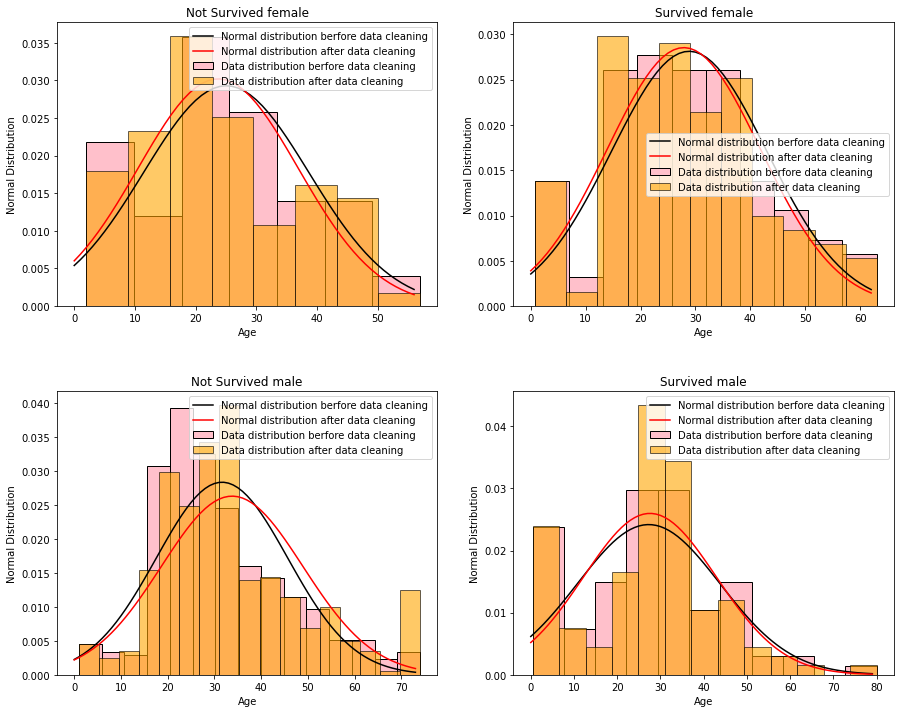

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

for i in range(2):
    for j in range(2):
        for k in range(2):

            d=(TrainDf, df)[k]
            sex=['female', 'male'][i]
            age=d[(d['Survived']==j) & (d['Sex']==sex)]['Age']
            
            prob=Probability()
            prob.fit(age)


            ax[i, j].hist(
                age,
                bins='auto',
                density=True,
                edgecolor='black',
                alpha = 1 if k==0 else 0.6,
                color='pink' if k==0 else 'orange',
                label='Data distribution berfore data cleaning' if k==0 else 'Data distribution after data cleaning'
            )

            ax[i ,j].plot(
                age1 := np.arange(age.max()),
                prob.transform(age1),
                color='black' if k==0 else 'red',
                label='Normal distribution berfore data cleaning' if k==0 else 'Normal distribution after data cleaning'
                )

        ax[i, j].legend()
        ax[i, j].set(
            xlabel='Age',
            ylabel='Normal Distribution',
            title=str('Not Survived ' if j==0 else 'Survived ') + sex
        )

Obviously, it's clear the difference between <b>Normal Distribution of Age before the data cleaning and after that is neglegible</b> in each subplots; therefore, it's a compelling reason to improve the assertion, which the data cleaning of the Age data is acceptable.

# <b>4.Extracting Information From Existing Data

In [ ]:
df.insert(
    loc=3,
    column='Name_Title',
    value=df['Name'].apply( lambda x: x.split(',')[1].split('.')[0].strip())
)

df.insert(
    loc=10,
    column='Ticket_Letter',
    value=df['Ticket'].apply( lambda x: 0 if x.isnumeric() else x.split(' ')[0].strip())
)

df.insert(
    loc = 11,
    column = 'Ticket_Number',
    value = df['Ticket'].apply(lambda x: x if x.isnumeric() else x.split(' ')[1].strip() if len(x.split(' '))>1 else 0 )
)

df.insert(
    loc=14,
    column='Cabin_Letter',
    value=df['Cabin'].apply( lambda x: str(x)[0].strip())
)

df=df[df['Embarked'].notna()]
df.drop(['PassengerId', 'Ticket', 'Cabin'], axis='columns', inplace=True)

df.head()

,Survived,Pclass,Name_Title,Name,Sex,Age,SibSp,Parch,Ticket_Letter,Ticket_Number,Fare,Cabin_Letter,Embarked
0,0,3,Mr,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5,21171,7.2500,n,S
1,1,1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC,17599,71.2833,C,C
2,1,3,Miss,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2.,3101282,7.9250,n,S
3,1,1,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,0,113803,53.1000,C,S
4,0,3,Mr,"Allen, Mr. William Henry",male,35.0,0,0,0,373450,8.0500,n,S


,Name
Survived,
0,549
1,340


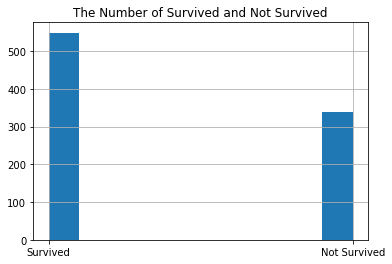

In [ ]:
df['Survived'].hist()
plt.xticks([0, 1], labels=['Survived', 'Not Survived'])
plt.title('The Number of Survived and Not Survived');

pd.pivot_table(data=df, index='Survived', values='Name' ,aggfunc='count')

count         
Pclass              1   2    3
Survived Sex                  
0        female     3   6   72
         male      77  91  300
1        female    89  70   72
         male      45  17   47

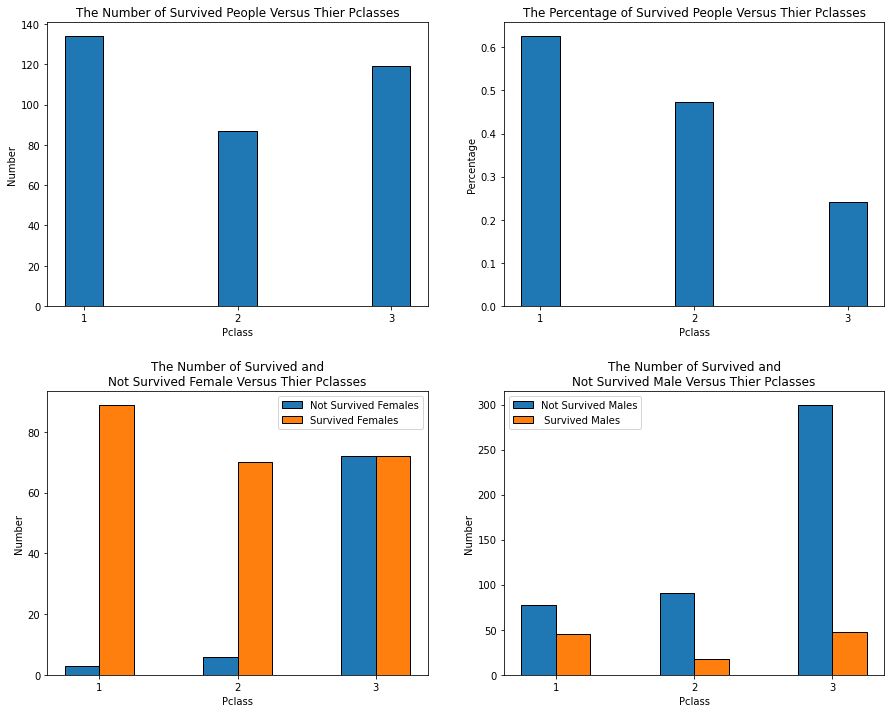

In [ ]:
fig, ax =plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

width=0.25

#=======================================================================[0, 0] SubPlot============================================================================================
#==============================================="The Number of Survived and Not Survived People Versus Thier Pclasses"==============================================================

ax[0, 0].bar(
    df[df['Survived']==1]['Pclass'].value_counts().sort_index().index,
    df[df['Survived']==1]['Pclass'].value_counts().sort_index().values,
    width=width, edgecolor='black'
)
ax[0, 0].set(
    title='The Number of Survived People Versus Thier Pclasses',
    ylabel='Number',
    xlabel='Pclass',
    xticks=[1, 2, 3]
    )

#=======================================================================[0, 1] SubPlot=============================================================================================
#=============================================="The Percentage of Survived and Not Survived People Versus Thier Pclasses"=========================================================

ax[0, 1].bar(
    df[df['Survived']==1]['Pclass'].value_counts().sort_index().index,
    df[df['Survived']==1]['Pclass'].value_counts().sort_index().values/df['Pclass'].value_counts().sort_index().values,
    width=width, edgecolor='black'
    )
ax[0, 1].set(
    title='The Percentage of Survived People Versus Thier Pclasses',
    ylabel='Percentage',
    xlabel='Pclass',
    xticks=[1, 2, 3]
    )

#======================================================================[1, 0] SubPlot================================================================================================
#=============================================="The Number of Survived and Not Survived Female Versus Thier Pclasses"================================================================

ax[1, 0].bar(
    df[(df['Survived']==0) & (df['Sex']=='female')]['Pclass'].value_counts().sort_index().index - 0.5*width,
    df[(df['Survived']==0) & (df['Sex']=='female')]['Pclass'].value_counts().sort_index().values,
    #class_survived.loc[0, 'female'],
    width=width, label='Not Survived Females', edgecolor='black'
    )
ax[1, 0].bar(
    df[(df['Survived']==1) & (df['Sex']=='female')]['Pclass'].value_counts().sort_index().index + 0.5*width,
    df[(df['Survived']==1) & (df['Sex']=='female')]['Pclass'].value_counts().sort_index().values,
    width=width, label='Survived Females', edgecolor='black')

ax[1, 0].legend()
ax[1, 0].set(
    title='The Number of Survived and\nNot Survived Female Versus Thier Pclasses',
    ylabel='Number',
    xlabel='Pclass',
    xticks=[1, 2, 3]
    )

#===========================================================================[1, 1] SubPlot===========================================================================================
#====================================================="The Number of Survived and Not Survived Male Versus Thier Pclasses"================================================================

ax[1, 1].bar(
    df[(df['Survived']==0) & (df['Sex']=='male')]['Pclass'].value_counts().sort_index().index - 0.5*width,
    df[(df['Survived']==0) & (df['Sex']=='male')]['Pclass'].value_counts().sort_index().values,
    width=width,label='Not Survived Males', edgecolor='black'
    )
ax[1, 1].bar(
    df[(df['Survived']==1) & (df['Sex']=='male')]['Pclass'].value_counts().sort_index().index + 0.5*width,
    df[(df['Survived']==1) & (df['Sex']=='male')]['Pclass'].value_counts().sort_index().values,
    width=width, label=' Survived Males', edgecolor='black'
    )
ax[1, 1].legend()

ax[1, 1].set(
    title='The Number of Survived and\nNot Survived Male Versus Thier Pclasses',
    ylabel='Number',
    xlabel='Pclass',
    xticks=[1, 2, 3]
);

#=========================================================================Making Pivot Table=======================================================================================

pd.pivot_table(
    df,
    values='Name',
    index=['Survived', 'Sex'],
    columns=['Pclass'],
    aggfunc=['count'] 
)


mean                      
                       Age                      
Pclass                   1          2          3
Survived Sex                                    
0        female  25.666667  36.000000  22.611111
         male    45.629870  33.362637  30.863333
1        female  35.168539  28.492857  18.270833
         male    35.598222  17.666471  23.434468

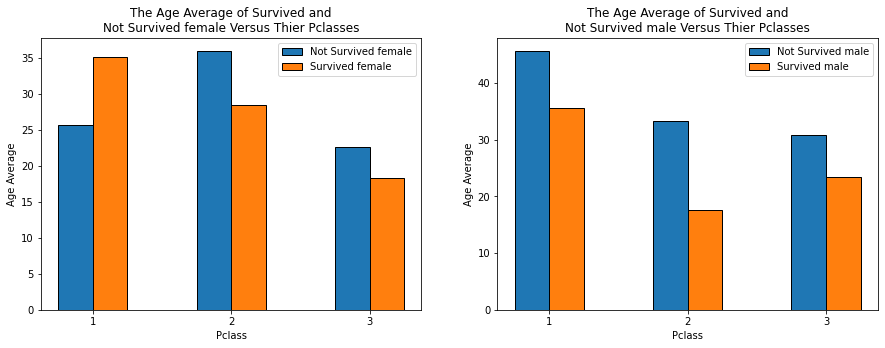

In [ ]:
fig, ax =plt.subplots(1, 2, figsize=(15, 5))

width=0.25
for j in range(2):
    for k in range(2):
        
        sex=['female', 'male'][j]
        age_mean=df[(df['Sex']==sex) & (df['Survived']==k)].groupby('Pclass')['Age'].mean()

        ax[j].bar(
            age_mean.index-0.5*width if k==0 else age_mean.index+0.5*width,
            age_mean.values,
            label=f'Not Survived {sex}' if k==0 else f'Survived {sex}',
            edgecolor='black', width=width
        )

    ax[j].legend()
    ax[j].set(
        title=f'The Age Average of Survived and\nNot Survived {sex} Versus Thier Pclasses',
        ylabel='Age Average',
        xlabel='Pclass',
        xticks=[1, 2, 3])

#================================================================Making Pivot Table==================================================================================

pd.pivot_table(
    df,
    index=['Survived', 'Sex'],
    values=['Age'],
    columns='Pclass',
    aggfunc=['mean']
)

In [ ]:
pd.DataFrame(
    df['Name_Title'].value_counts().values,
    index=df['Name_Title'].value_counts().index,
    columns=['Count'],
    dtype=int)

,Count
Mr,517
Miss,181
Mrs,124
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2
the Countess,1


In [ ]:
pd.pivot_table(
    df,
    index='Cabin_Letter',
    columns='Pclass',
    values='Name',
    aggfunc=['count']
).join(
        pd.pivot_table(
        df,
        index='Cabin_Letter',
        columns='Pclass',
        values='Fare',
        aggfunc=['mean'])).fillna('----')

count                      mean                      
Pclass           1      2      3           1          2          3
Cabin_Letter                                                      
A             15.0   ----   ----   39.623887       ----       ----
B             45.0   ----   ----  114.994909       ----       ----
C             59.0   ----   ----  100.151341       ----       ----
D             29.0    4.0   ----   63.324286  13.166675       ----
E             25.0    4.0    3.0   55.740168    11.5875       11.0
F             ----    8.0    5.0        ----      23.75   10.61166
G             ----   ----    4.0        ----       ----   13.58125
T              1.0   ----   ----        35.5       ----       ----
n             40.0  168.0  479.0   76.848643  20.909673  13.725077

1. According to the above table, the calss of <b>A, B, C </b> are just the <b>first class</b> cabins with the average fare about  <b>39.62, 115, and 100.15 </b> respectively

2. The <b>D</b> type is <b>the first and second class</b> with <b>63.3 and 13.16</b> average fare for <b>the first and second class</b> respectively

3. The <b>E</b> type is in <b>the all cabin classes</b> with <b>55.74, 11.58, and 11</b> average fare for <b>the first, second, and third class</b> respectively

4. The <b>F</b> type is <b>the second and third class</b> with <b>23.7 and 10.6</b> average fare for <b>the second and third class</b> respectively

5. The <b>G</b> type is just <b>the third class</b> with <b>13.58</b> average fare

Due to <b>the data sparcity and the vast number of the missing values</b> for Cabin_Letter, exactly in the <b>second and third class</b>, we are not able to anticipate the missing values and allocate them; hence, we have to eliminate this feature.

# <b>5.Making Pipeline and Hyper Parameter Tuning

### <b>5.1.Feature Selection

In [ ]:
X_train = df[['Sex', 'Embarked', 'Age', 'Pclass', 'SibSp', 'Parch']]
Y_train=df['Survived'].values

### <b>5.2.Creating Column Transformer

<b>! It worth be noted,</b> due to avoiding <b>Multicolinearity phenomenon,</b> the <b>First Columns</b> of each OneHotEncoder transformers have been droped.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

ClmnTrans=make_column_transformer(
    (OneHotEncoder(drop='first', categories=[['female', 'male'], ['S', 'C', 'Q']]), ['Sex', 'Embarked']),
    (MinMaxScaler(), ['Age']),
    remainder='passthrough'
)

pd.DataFrame(ClmnTrans.fit_transform(X_train), columns=['male', 'C', 'Q', 'Age', 'Pclass', 'SibSp', 'Parch'])


,male,C,Q,Age,Pclass,SibSp,Parch
0,1.0,0.0,0.0,0.271174,3.0,1.0,0.0
1,0.0,1.0,0.0,0.472229,1.0,1.0,0.0
2,0.0,0.0,0.0,0.321438,3.0,0.0,0.0
3,0.0,0.0,0.0,0.434531,1.0,1.0,0.0
4,1.0,0.0,0.0,0.434531,3.0,0.0,0.0
...,...,...,...,...,...,...,...
884,1.0,0.0,0.0,0.334004,2.0,0.0,0.0
885,0.0,0.0,0.0,0.233476,1.0,0.0,0.0
886,0.0,0.0,0.0,0.321438,3.0,1.0,2.0
887,1.0,1.0,0.0,0.321438,1.0,0.0,0.0


### <b>5.3.Model Selection and Hyper Parameter Tuning

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

classifier1=(

    (SVC(),
        {'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid'],
        'svc__C':np.arange(60, 101, step=10),
        'svc__gamma':['scale', 'auto']}),

    (KNeighborsClassifier(),
        {'kneighborsclassifier__n_neighbors': np.arange(3, 6),
        'kneighborsclassifier__weights': ['uniform', 'distance']}),

    (RandomForestClassifier(),
        {'randomforestclassifier__n_estimators': np.arange(80, 151, step=10),
        'randomforestclassifier__criterion': ['gini', 'entropy']})

)



results1={}
for clf, params in classifier1:
    pipe=make_pipeline(ClmnTrans, clf)

    Grid1=GridSearchCV(
            estimator=pipe,
            param_grid=params,
            cv=5
        )
    Grid1.fit(X_train, Y_train)

    results1[str(clf)]=Grid1.best_params_
    results1[str(clf)]['***Score***']=Grid1.best_score_

pd.DataFrame(results1).fillna('----')   

,SVC(),KNeighborsClassifier(),RandomForestClassifier()
svc__C,80,----,----
svc__gamma,auto,----,----
svc__kernel,poly,----,----
***Score***,0.82345,0.817755,0.835758
kneighborsclassifier__n_neighbors,----,3,----
kneighborsclassifier__weights,----,uniform,----
randomforestclassifier__criterion,----,----,entropy
randomforestclassifier__n_estimators,----,----,150


### <b>5.4.Creating Ensemble Model

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

pipe1 = make_pipeline(ClmnTrans, RandomForestClassifier(n_estimators=90, criterion='gini'))
pipe2 = make_pipeline(ClmnTrans, SVC(kernel='poly', C=80, gamma='auto', probability=True))
pipe3 = make_pipeline(ClmnTrans, KNeighborsClassifier(n_neighbors=3, weights='uniform'))

EClf = VotingClassifier(
                        estimators=[
                            ('RF', pipe1),
                            ('SVM', pipe2),
                            ('KNN', pipe3)],
                            weights=[5, 2, 1], voting='hard')

EClf_cv=cross_val_score(EClf, X_train, Y_train, cv=5)

print('CV Scores:', EClf_cv)
print('===================================================================')
print('The Average of The CV is:', EClf_cv.mean())
print('===================================================================')
print('The STD of The CV is:', EClf_cv.std())

CV Scores: [0.79775281 0.8258427  0.85393258 0.84269663 0.82485876]
The Average of The CV is: 0.8290166952326541
The STD of The CV is: 0.019040669212292305


### <b>5.5.Training Ensemble Classifier

In [ ]:
EClf.fit(X_train, Y_train);

# <b>6.Testing Model

### <b>6.1.Creating Test Set

In [ ]:
X_test=TestDf[['Sex', 'Embarked', 'Age', 'Pclass', 'SibSp', 'Parch']].copy()
X_test

,Sex,Embarked,Age,Pclass,SibSp,Parch
0,male,Q,34.5,3,0,0
1,female,S,47.0,3,1,0
2,male,Q,62.0,2,0,0
3,male,S,27.0,3,0,0
4,female,S,22.0,3,1,1
...,...,...,...,...,...,...
413,male,S,NaN,3,0,0
414,female,C,39.0,1,0,0
415,male,S,38.5,3,0,0
416,male,S,NaN,3,0,0


### <b>6.2.Filling Missing Values of Test Set

In [ ]:
X_test.isna().sum()

Sex          0
Embarked     0
Age         86
Pclass       0
SibSp        0
Parch        0
dtype: int64

In [ ]:
AA = np.vstack([X_test['Age'].values.reshape(-1, 1), X_train['Age'].values.reshape(-1, 1)])
X_test.fillna(np.nanmean(AA), inplace=True)

Due to <b>The Survived Status in the Test Set is Unknown,</b> The missing values of <b>the Age</b> have been filled with <b>The Average of Age from the Train and Test Sets<b>

In [ ]:
X_test['Survived'] = EClf.predict(X_test)
X_test

,Sex,Embarked,Age,Pclass,SibSp,Parch,Survived
0,male,Q,34.500000,3,0,0,0
1,female,S,47.000000,3,1,0,0
2,male,Q,62.000000,2,0,0,0
3,male,S,27.000000,3,0,0,1
4,female,S,22.000000,3,1,1,0
...,...,...,...,...,...,...,...
413,male,S,30.486216,3,0,0,0
414,female,C,39.000000,1,0,0,1
415,male,S,38.500000,3,0,0,0
416,male,S,30.486216,3,0,0,0


# <center><b>FINISH